# Forecasting Exercises

This exercise walks thorugh a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset. This time we we are using a seasonal time series of California Hospitality Industry Employees.

### Import General Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the Dataset

In [2]:
data = pd.read_csv("../Data/HospitalityEmployees.csv", index_col="Date", parse_dates=True)
data.index.freq = "MS"

In [3]:
data = data.dropna()

In [4]:
data

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7
1990-06-01,1123.5
1990-07-01,1134.2
1990-08-01,1137.4
1990-09-01,1128.8


In [5]:
data.shape

(348, 1)

### Plot the Source Data

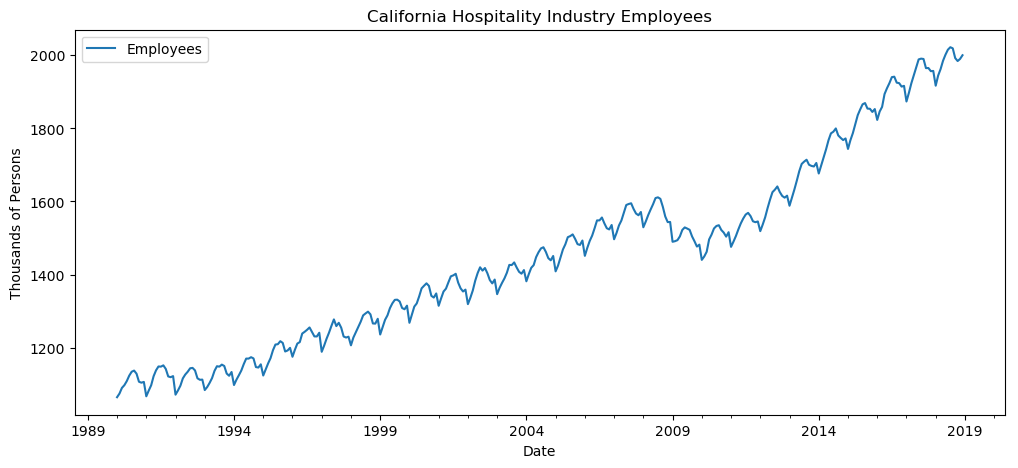

In [6]:
data.plot(figsize=(12,5))
plt.title("California Hospitality Industry Employees")
plt.xlabel("Date")
plt.ylabel("Thousands of Persons");

### ETS Decomposition

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

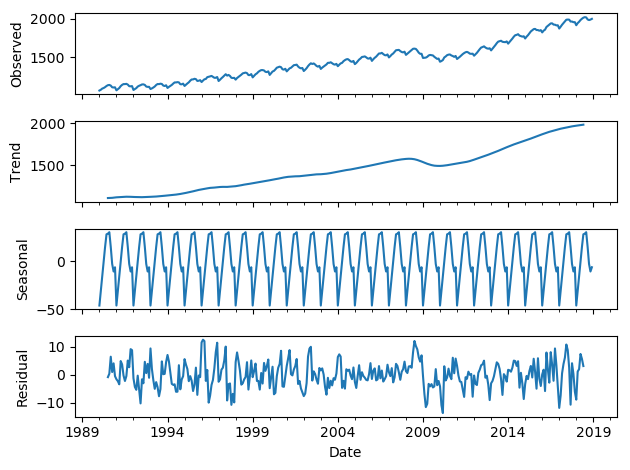

In [8]:
results = seasonal_decompose(data["Employees"], model="add")
results.plot();

**Expose the Seasonality with Month and Quarter Plots**

In [9]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

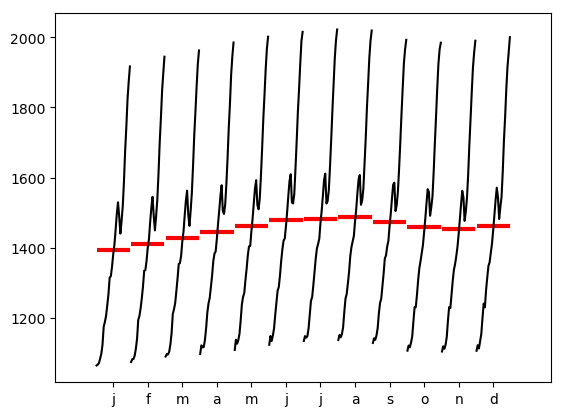

In [10]:
month_plot(data["Employees"]);

### lag_plot

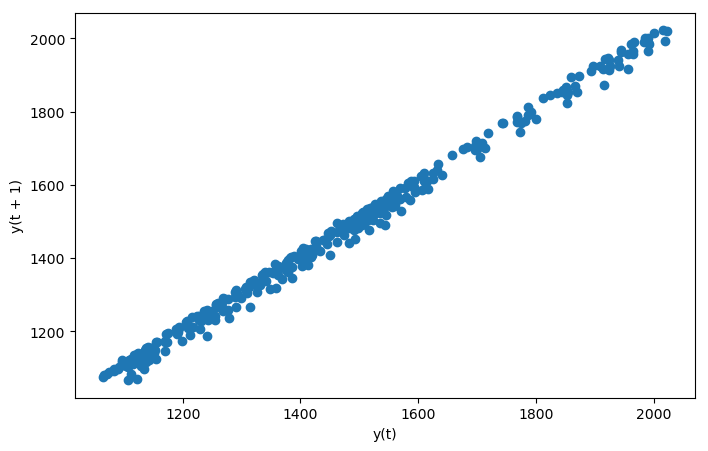

In [11]:
from pandas.plotting import lag_plot
plt.figure(figsize=(8,5))
lag_plot(data["Employees"]);

### ACF and PACF Plots

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

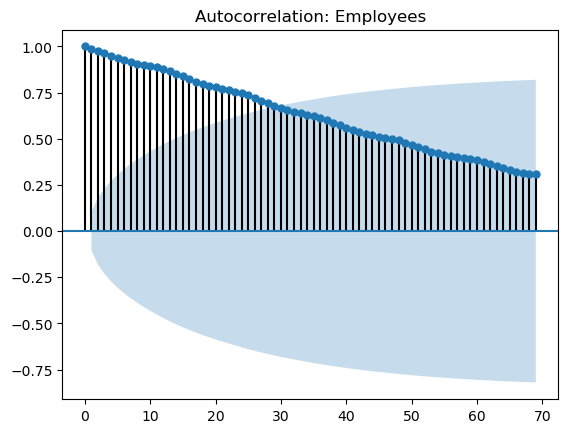

In [13]:
title = "Autocorrelation: Employees"
lags = 0.2 * len(data)
plot_acf(data, title=title, lags=lags);

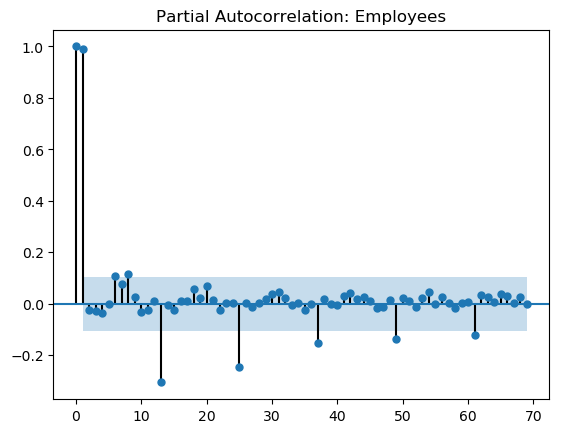

In [14]:
title = "Partial Autocorrelation: Employees"
lags = 0.2 * len(data)
plot_pacf(data["Employees"], title=title, lags=lags);

### Train-Test-Split

In [15]:
train_set = data.iloc[:-36]
test_set = data.iloc[-36:]

## Build and Fit the Model

### 1. Holt-Winters Method

*This model takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behaviour.*

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
holt_winters_model = ExponentialSmoothing(train_set["Employees"], trend="add", seasonal="add", seasonal_periods=12).fit()

In [18]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [19]:
holwin_preds=holt_winters_model.forecast(36).rename("Holt-Winters Forecast")

In [20]:
holwin_preds

2016-01-01    1824.313662
2016-02-01    1844.195196
2016-03-01    1863.651284
2016-04-01    1888.673386
2016-05-01    1912.070416
2016-06-01    1929.321014
2016-07-01    1937.721465
2016-08-01    1942.235131
2016-09-01    1927.808492
2016-10-01    1922.157727
2016-11-01    1915.003861
2016-12-01    1923.934802
2017-01-01    1895.122909
2017-02-01    1915.004443
2017-03-01    1934.460531
2017-04-01    1959.482633
2017-05-01    1982.879663
2017-06-01    2000.130261
2017-07-01    2008.530711
2017-08-01    2013.044377
2017-09-01    1998.617739
2017-10-01    1992.966974
2017-11-01    1985.813108
2017-12-01    1994.744049
2018-01-01    1965.932156
2018-02-01    1985.813690
2018-03-01    2005.269778
2018-04-01    2030.291880
2018-05-01    2053.688910
2018-06-01    2070.939508
2018-07-01    2079.339958
2018-08-01    2083.853624
2018-09-01    2069.426986
2018-10-01    2063.776221
2018-11-01    2056.622354
2018-12-01    2065.553296
Freq: MS, Name: Holt-Winters Forecast, dtype: float64

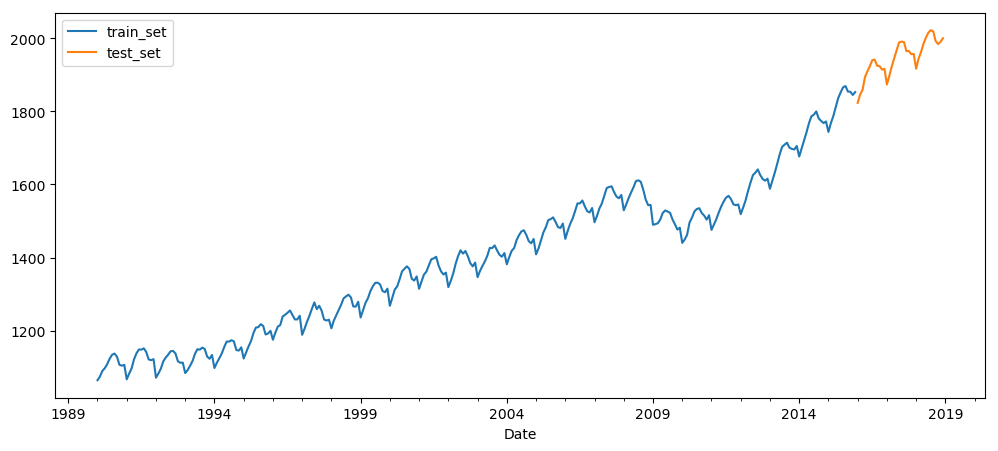

In [21]:
train_set["Employees"].plot(label="train_set", legend=True, figsize=(12,5))
test_set["Employees"].plot(label="test_set", legend=True);

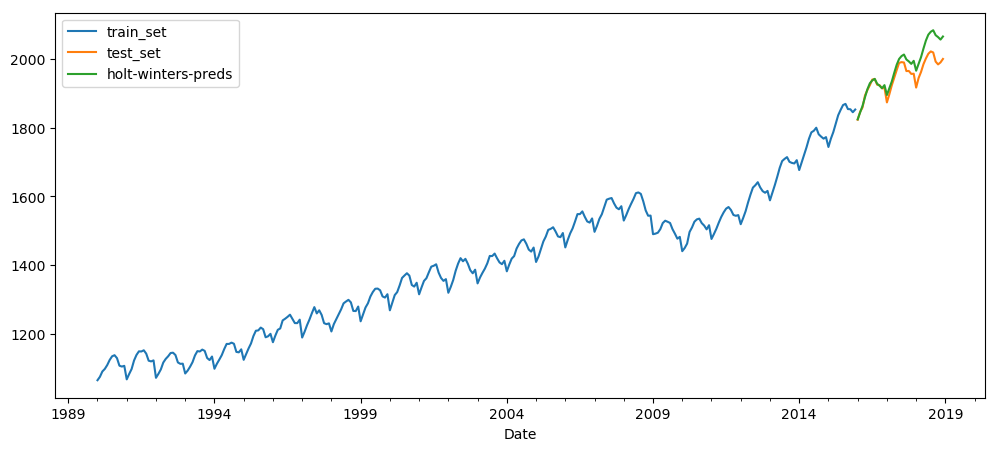

In [22]:
train_set["Employees"].plot(label="train_set", legend=True, figsize=(12,5))
test_set["Employees"].plot(label="test_set", legend=True)
holwin_preds.plot(label="holt-winters-preds", legend=True);

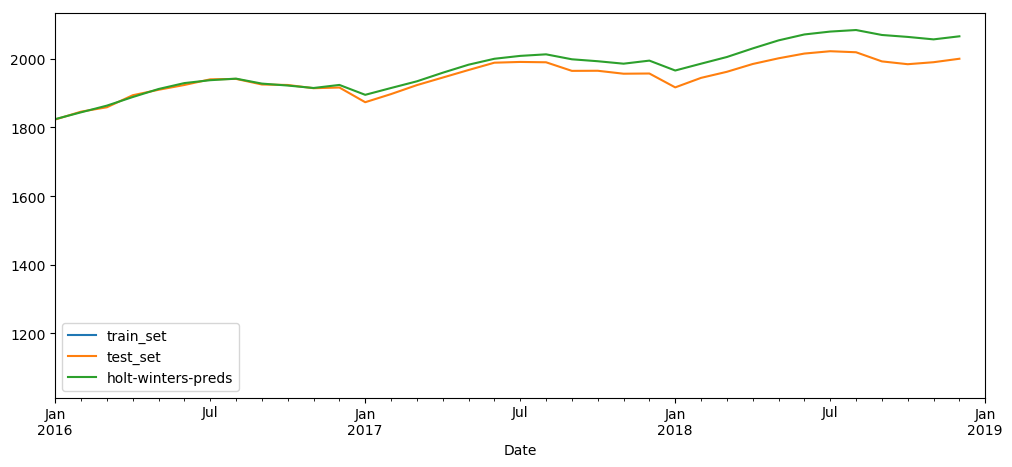

In [23]:
train_set["Employees"].plot(label="train_set", legend=True, figsize=(12,5))
test_set["Employees"].plot(label="test_set", legend=True)
holwin_preds.plot(label="holt-winters-preds", legend=True, xlim=["2016-01-01","2019-01-01"]);

### 2. AutoRegression Model

In [24]:
from statsmodels.tsa.ar_model import AR, ARResults

**Fit the AR Model**

In [25]:
import warnings 
warnings.filterwarnings("ignore")

In [26]:
autoregressive_model = AR(train_set["Employees"])

**Use Statsmodels to Find the Best Order(p)**

In [27]:
ar_model_2 = autoregressive_model.fit(maxlag=2, method="mle")
print(f"The best lag choosen for this case is: {ar_model_2.k_ar}")
print(f"Coefficients: \n{ar_model_2.params}")

The best lag choosen for this case is: 2
Coefficients: 
const           2.184292
L1.Employees    1.151051
L2.Employees   -0.152563
dtype: float64


In [28]:
ar_model_3 = autoregressive_model.fit(maxlag=3, method="mle")
print(f"The best lag choosen for this case is: {ar_model_3.k_ar}")
print(f"Coefficients: \n{ar_model_3.params}")

The best lag choosen for this case is: 3
Coefficients: 
const           2.680340
L1.Employees    1.130434
L2.Employees    0.004707
L3.Employees   -0.137004
dtype: float64


In [29]:
ar_model_4 = autoregressive_model.fit(maxlag=4, method="mle")
print(f"The best lag choosen for this case is: {ar_model_4.k_ar}")
print(f"Coefficients: \n{ar_model_4.params}")

The best lag choosen for this case is: 4
Coefficients: 
const           3.128043
L1.Employees    1.117528
L2.Employees    0.005327
L3.Employees   -0.029630
L4.Employees   -0.095407
dtype: float64


In [30]:
labels = ["AR(2)", "AR(3)", "AR(4)"]
models = [ar_model_2, ar_model_3, ar_model_4]

for i in range(3):
    print(f"{labels[i]} has AIC: {models[i].aic:6.5}")

AR(2) has AIC: 5.6951
AR(3) has AIC: 5.7015
AR(4) has AIC:  5.708


***Looks like the AR(2) (second order) has the best performance***

**AR Prediction**

In [31]:
start = len(train_set)
end = len(train_set) + len(test_set) - 1

In [81]:
autoreg = AR(train_set["Employees"])
ar_model = autoreg.fit(maxlag=2, method="mle")
ar_preds = ar_model.predict(start=start, end=end, dynamic=False).rename("AR(2) forecast")

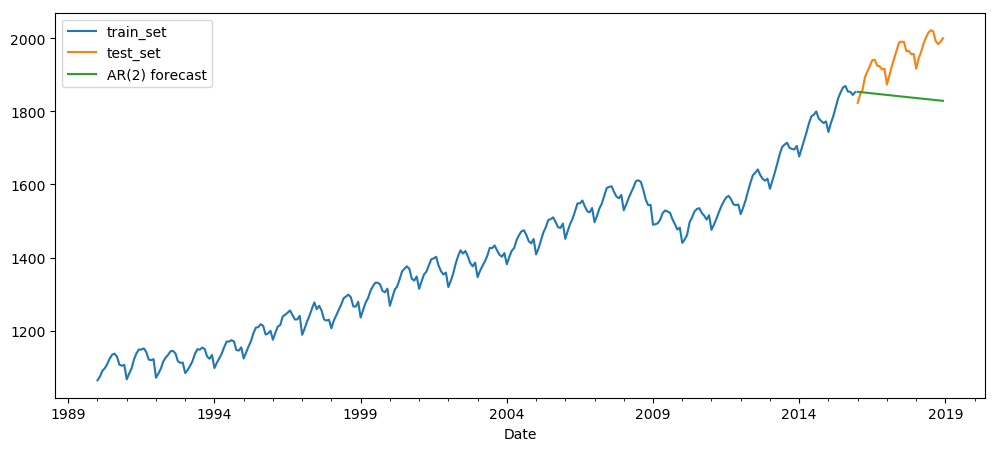

In [82]:
train_set["Employees"].plot(legend=True, figsize=(12,5), label="train_set")
test_set["Employees"].plot(legend=True, label="test_set")
ar_preds.plot(legend=True);

### 3. AutoRegressive Moving Average - ARMA model

In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
from statsmodels.tsa.arima_model import ARMA, ARMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

C:\Users\hp\anaconda3\envs\tsa_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


**Test the Stationarity with Dickey-Fuller Test**

In [36]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=""):
    print(f"Augmented Dickey-Fuller test: {title}")
    results = adfuller(series.dropna(), autolag="AIC")
    labels = ["ADF test statistics", "p-value", "# lags used", "# observations"]
    output = pd.Series(results[:4], index=labels)
    
    for key, value in results[4].items():
        output[f"critical value ({key})"] = value
        
    print(output.to_string())
    
    if results[1] <= 0.05:
        print("Strong evidence againts the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence againts the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

**Let's Find the ARMA(p,q) Orders**

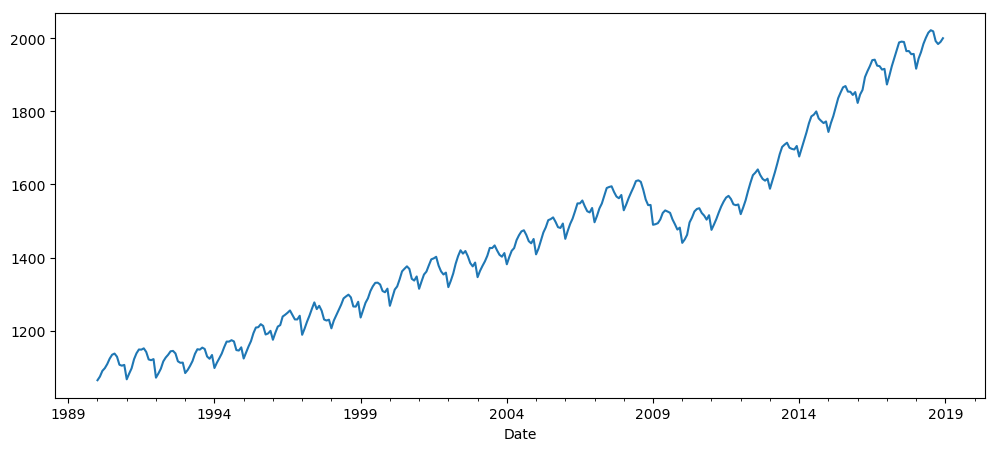

In [37]:
data["Employees"].plot(figsize=(12,5));

**Run the Augmented Dickey-Fuller Test**

In [38]:
adf_test(data["Employees"])

Augmented Dickey-Fuller test: 
ADF test statistics       0.901284
p-value                   0.993107
# lags used              17.000000
# observations          330.000000
critical value (1%)      -3.450322
critical value (5%)      -2.870338
critical value (10%)     -2.571458
Weak evidence againts the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


**Transform the Data to Get Stationary Data**

In [39]:
df_transformed = data.diff()

In [40]:
df_transformed = df_transformed.dropna()

In [41]:
adf_test(df_transformed["Employees"], title="Data First Diff")

Augmented Dickey-Fuller test: Data First Diff
ADF test statistics      -3.068279
p-value                   0.028992
# lags used              17.000000
# observations          329.000000
critical value (1%)      -3.450384
critical value (5%)      -2.870365
critical value (10%)     -2.571472
Strong evidence againts the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


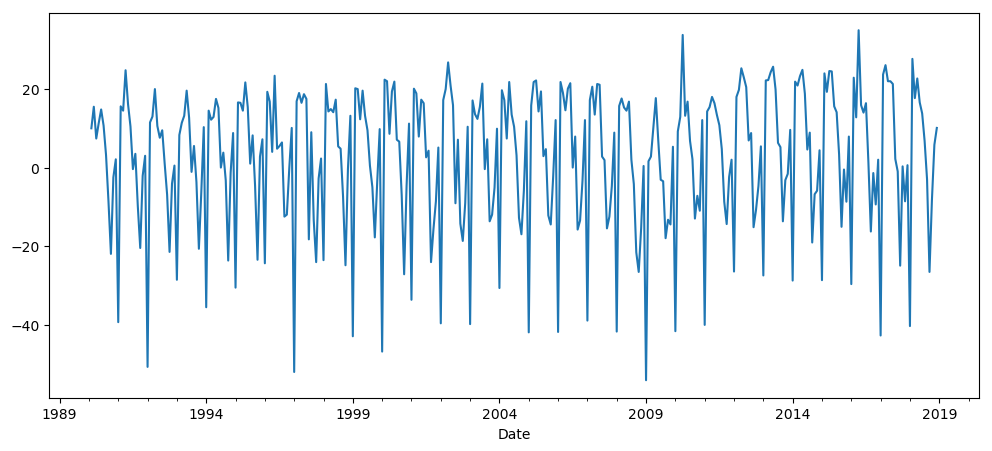

In [42]:
df_transformed["Employees"].plot(figsize=(12,5));

**Find (p,q) Orders with `pmdarima.auto_arima`**

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
auto_arima(df_transformed["Employees"], seasonal=False, maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  347
Model:                     ARMA(5, 4)   Log Likelihood               -1325.140
Method:                       css-mle   S.D. of innovations             10.507
Date:                Fri, 16 Feb 2024   AIC                           2672.280
Time:                        17:54:51   BIC                           2714.622
Sample:                             0   HQIC                          2689.139
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4100        nan        nan        nan         nan         nan
ar.L1.y        0.3253        nan        nan        nan         nan         nan
ar.L2.y        0.0467    1.3e-07   3.61e+05      0.000       0.047       0.047
ar.L3.y        0.6042        nan        nan        nan         nan         nan
ar.L4.y       -0.6985    6.2e-06  -1.13e+05      0.000      -0.698      -0.698
ar.L5.y       -0.4002   4.29e-06  -9.33e+04      0.000      -0.400      -0.400
ma.L1.y       -0.6445      0.022    -29.127      0.000      -0.688      -0.601
ma.L2.y        0.0983      0.025      3.949      0.000       0.050       0.147
ma.L3.y       -0.6622      0.029    -22.811      0.000      -0.719      -0.605
ma.L4.y        0.9838      0.038     26.189      0.000       0.910       1.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8664           -0.4994j            1.0000           -0.0832
AR.2            0.8664           +0.4994j            1.0000            0.0832
AR.3           -0.5081           -0.8700j            1.0075           -0.3341
AR.4           -0.5081           +0.8700j            1.0075            0.3341
AR.5           -2.4618           -0.0000j            2.4618           -0.5000
MA.1           -0.5441           -0.8390j            1.0000           -0.3416
MA.2           -0.5441           +0.8390j            1.0000            0.3416
MA.3            0.8806           -0.4909j            1.0082           -0.0809
MA.4            0.8806           +0.4909j            1.0082            0.0809
-----------------------------------------------------------------------------
"""

**Fit the ARMA Model**

In [45]:
arma_train = df_transformed[:-36]
arma_test = df_transformed[-36:]

In [46]:
arma_model = ARMA(arma_train["Employees"], order=(5,4))

In [47]:
arma_results = arma_model.fit()

In [48]:
arma_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Employees   No. Observations:                  311
Model:                     ARMA(5, 4)   Log Likelihood               -1183.098
Method:                       css-mle   S.D. of innovations             10.223
Date:                Fri, 16 Feb 2024   AIC                           2388.196
Time:                        17:54:54   BIC                           2429.334
Sample:                    02-01-1990   HQIC                          2404.639
                         - 12-01-2015                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.2120        nan        nan        nan         nan         nan
ar.L1.Employees     0.3303   1.61e-06   2.05e+05      0.000       0.330       0.330
ar.L2.Employees     0.0422   1.28e-07   3.31e+05      0.000       0.042       0.042
ar.L3.Employees     0.6083        nan        nan        nan         nan         nan
ar.L4.Employees    -0.7024   6.01e-06  -1.17e+05      0.000      -0.702      -0.702
ar.L5.Employees    -0.3962   4.14e-06  -9.56e+04      0.000      -0.396      -0.396
ma.L1.Employees    -0.6464      0.021    -30.931      0.000      -0.687      -0.605
ma.L2.Employees     0.0985      0.024      4.136      0.000       0.052       0.145
ma.L3.Employees    -0.6597      0.027    -24.637      0.000      -0.712      -0.607
ma.L4.Employees     0.9877      0.025     40.193      0.000       0.940       1.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8666           -0.4991j            1.0000           -0.0832
AR.2            0.8666           +0.4991j            1.0000            0.0832
AR.3           -0.5073           -0.8694j            1.0065           -0.3341
AR.4           -0.5073           +0.8694j            1.0065            0.3341
AR.5           -2.4912           -0.0000j            2.4912           -0.5000
MA.1           -0.5444           -0.8388j            1.0000           -0.3416
MA.2           -0.5444           +0.8388j            1.0000            0.3416
MA.3            0.8784           -0.4908j            1.0062           -0.0811
MA.4            0.8784           +0.4908j            1.0062            0.0811
-----------------------------------------------------------------------------
"""

In [50]:
arma_preds = arma_results.predict(start=len(arma_train), end=len(arma_test)+len(arma_train)-1)

In [51]:
df_arma_preds = pd.DataFrame(arma_preds, columns=["EmployeeForecast"])
df_arma_preds

,EmployeeForecast
2016-01-01,-16.860892
2016-02-01,12.285612
2016-03-01,12.144367
2016-04-01,11.084586
2016-05-01,22.832211
2016-06-01,15.920573
2016-07-01,2.040529
2016-08-01,5.110813
2016-09-01,-6.497050
2016-10-01,-18.444490


In [52]:
df_arma_preds["RealEmployeeForecast"] = data["Employees"].iloc[-36-1] + df_arma_preds["EmployeeForecast"].cumsum()

In [53]:
df_arma_preds

,EmployeeForecast,RealEmployeeForecast
2016-01-01,-16.860892,1836.039108
2016-02-01,12.285612,1848.324720
2016-03-01,12.144367,1860.469088
2016-04-01,11.084586,1871.553674
2016-05-01,22.832211,1894.385885
2016-06-01,15.920573,1910.306458
2016-07-01,2.040529,1912.346987
2016-08-01,5.110813,1917.457800
2016-09-01,-6.497050,1910.960750
2016-10-01,-18.444490,1892.516260


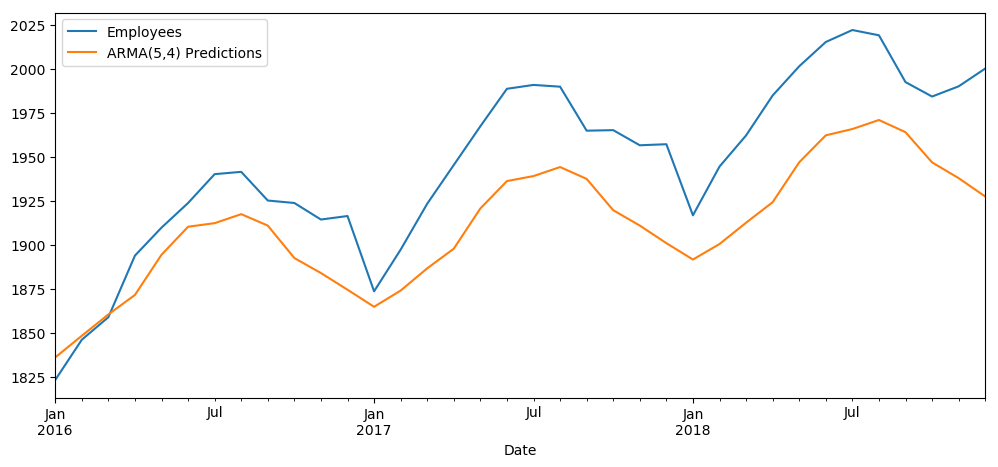

In [54]:
data["Employees"][-36:].plot(figsize=(12,5), legend=True).autoscale(axis="x", tight=True)
df_arma_preds["RealEmployeeForecast"].plot(legend=True, label="ARMA(5,4) Predictions");

### 4. AutoRegressive Intergrated Moving Average - ARIMA(p,d,q) Models

In [55]:
auto_arima(data["Employees"], error_action="ignore", seasonal=False, maxiter=1000).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  347
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -1325.140
Method:                       css-mle   S.D. of innovations             10.507
Date:                Fri, 16 Feb 2024   AIC                           2672.280
Time:                        17:55:54   BIC                           2714.622
Sample:                             1   HQIC                          2689.139
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4100        nan        nan        nan         nan         nan
ar.L1.D.y      0.3253        nan        nan        nan         nan         nan
ar.L2.D.y      0.0467    1.3e-07   3.61e+05      0.000       0.047       0.047
ar.L3.D.y      0.6042        nan        nan        nan         nan         nan
ar.L4.D.y     -0.6985    6.2e-06  -1.13e+05      0.000      -0.698      -0.698
ar.L5.D.y     -0.4002   4.29e-06  -9.33e+04      0.000      -0.400      -0.400
ma.L1.D.y     -0.6445      0.022    -29.127      0.000      -0.688      -0.601
ma.L2.D.y      0.0983      0.025      3.949      0.000       0.050       0.147
ma.L3.D.y     -0.6622      0.029    -22.811      0.000      -0.719      -0.605
ma.L4.D.y      0.9838      0.038     26.189      0.000       0.910       1.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8664           -0.4994j            1.0000           -0.0832
AR.2            0.8664           +0.4994j            1.0000            0.0832
AR.3           -0.5081           -0.8700j            1.0075           -0.3341
AR.4           -0.5081           +0.8700j            1.0075            0.3341
AR.5           -2.4618           -0.0000j            2.4618           -0.5000
MA.1           -0.5441           -0.8390j            1.0000           -0.3416
MA.2           -0.5441           +0.8390j            1.0000            0.3416
MA.3            0.8806           -0.4909j            1.0082           -0.0809
MA.4            0.8806           +0.4909j            1.0082            0.0809
-----------------------------------------------------------------------------
"""

***The recommended order for ARIMA model is (3,1,4)***

In [56]:
stepwise_fit = auto_arima(data["Employees"], start_p=0, start_q=0,
                          max_p=6, max_q=6, m=12, d=None, trace=True,
                          error_action="ignore", 
                          suppress_warnings=True,
                          stepwise=True, seasonal=False, maxiter=1000)
stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=2974.636, BIC=2982.335, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2970.024, BIC=2981.572, Fit time=0.054 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2971.402, BIC=2982.950, Fit time=0.056 seconds
Fit ARIMA: order=(2, 1, 0); AIC=2966.008, BIC=2981.405, Fit time=0.082 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2967.864, BIC=2987.111, Fit time=0.122 seconds
Fit ARIMA: order=(3, 1, 1); AIC=2968.704, BIC=2991.800, Fit time=0.165 seconds
Fit ARIMA: order=(3, 1, 0); AIC=2967.388, BIC=2986.635, Fit time=0.104 seconds
Total fit time: 0.593 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  347
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1479.004
Method:                       css-mle   S.D. of innovations             17.171
Date:                Fri, 16 Feb 2024   AIC                           2966.008
Time:                        17:55:55   BIC                           2981.405
Sample:                             1   HQIC                          2972.138
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7186      1.228      2.214      0.027       0.312       5.125
ar.L1.D.y      0.1193      0.053      2.246      0.025       0.015       0.223
ar.L2.D.y      0.1309      0.053      2.464      0.014       0.027       0.235
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3456           +0.0000j            2.3456            0.0000
AR.2           -3.2574           +0.0000j            3.2574            0.5000
-----------------------------------------------------------------------------
"""

In [57]:
stepwise_fit = auto_arima(data["Employees"], start_p=0, start_q=0,
                          max_p=6, max_q=6, m=12, d=None, trace=True,
                          error_action="ignore", 
                          suppress_warnings=True,
                          stepwise=True, maxiter=1000)
stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2974.636, BIC=2982.335, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=2341.960, BIC=2357.357, Fit time=0.426 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=2707.381, BIC=2722.778, Fit time=0.452 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2970.022, BIC=2981.570, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=2279.200, BIC=2298.447, Fit time=1.291 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=2277.328, BIC=2292.726, Fit time=0.988 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 0, 0, 12); AIC=2279.233, BIC=2298.480, Fit time=1.474 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 0, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Fri, 16 Feb 2024   AIC                           2277.328
Time:                                    17:56:03   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [59]:
arma_order_select_ic(data["Employees"])

{'bic':              0            1            2
 0  4859.370356  4437.402211  4134.193274
 1  3011.258258  3010.350496  3008.713254
 2  3008.364607          NaN  2983.470928
 3  3010.253233  3012.261858  2981.893804
 4  3014.606667  3016.586710  2971.413363,
 'bic_min_order': (4, 2)}

**Fit the ARIMA Model**

In [60]:
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults

In [61]:
arima_model = ARIMA(train_set["Employees"], order=(5,1,4))
arima_results = arima_model.fit()
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Employees   No. Observations:                  311
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -1183.098
Method:                       css-mle   S.D. of innovations             10.223
Date:                Fri, 16 Feb 2024   AIC                           2388.196
Time:                        17:56:13   BIC                           2429.334
Sample:                    02-01-1990   HQIC                          2404.639
                         - 12-01-2015                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.2120        nan        nan        nan         nan         nan
ar.L1.D.Employees     0.3303   1.61e-06   2.05e+05      0.000       0.330       0.330
ar.L2.D.Employees     0.0422   1.28e-07   3.31e+05      0.000       0.042       0.042
ar.L3.D.Employees     0.6083        nan        nan        nan         nan         nan
ar.L4.D.Employees    -0.7024   6.01e-06  -1.17e+05      0.000      -0.702      -0.702
ar.L5.D.Employees    -0.3962   4.14e-06  -9.56e+04      0.000      -0.396      -0.396
ma.L1.D.Employees    -0.6464      0.021    -30.931      0.000      -0.687      -0.605
ma.L2.D.Employees     0.0985      0.024      4.136      0.000       0.052       0.145
ma.L3.D.Employees    -0.6597      0.027    -24.637      0.000      -0.712      -0.607
ma.L4.D.Employees     0.9877      0.025     40.193      0.000       0.940       1.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8666           -0.4991j            1.0000           -0.0832
AR.2            0.8666           +0.4991j            1.0000            0.0832
AR.3           -0.5073           -0.8694j            1.0065           -0.3341
AR.4           -0.5073           +0.8694j            1.0065            0.3341
AR.5           -2.4912           -0.0000j            2.4912           -0.5000
MA.1           -0.5444           -0.8388j            1.0000           -0.3416
MA.2           -0.5444           +0.8388j            1.0000            0.3416
MA.3            0.8784           -0.4908j            1.0062           -0.0811
MA.4            0.8784           +0.4908j            1.0062            0.0811
-----------------------------------------------------------------------------
"""

In [62]:
start = len(train_set)
end = len(train_set) + len(test_set) - 1

In [63]:
arima_preds = arima_results.predict(start=start, end=end, dynamic=False, typ="levels")

In [64]:
for i in range(len(arima_preds)):
    print(f"Predicted = {arima_preds[i]:<11.10}, expected={test_set['Employees'][i]}")

Predicted = 1836.039108, expected=1823.2
Predicted = 1848.32472 , expected=1846.1
Predicted = 1860.469088, expected=1858.9
Predicted = 1871.553674, expected=1893.9
Predicted = 1894.385885, expected=1909.8
Predicted = 1910.306458, expected=1923.8
Predicted = 1912.346987, expected=1940.2
Predicted = 1917.4578  , expected=1941.5
Predicted = 1910.96075 , expected=1925.2
Predicted = 1892.51626 , expected=1923.8
Predicted = 1883.990419, expected=1914.4
Predicted = 1874.517565, expected=1916.4
Predicted = 1864.819661, expected=1873.6
Predicted = 1874.031547, expected=1897.3
Predicted = 1886.670469, expected=1923.4
Predicted = 1897.838441, expected=1945.4
Predicted = 1920.701588, expected=1967.4
Predicted = 1936.25757 , expected=1988.7
Predicted = 1939.100196, expected=1990.9
Predicted = 1944.224824, expected=1989.9
Predicted = 1937.489669, expected=1964.9
Predicted = 1919.698861, expected=1965.2
Predicted = 1910.968353, expected=1956.6
Predicted = 1900.983175, expected=1957.2
Predicted = 1891

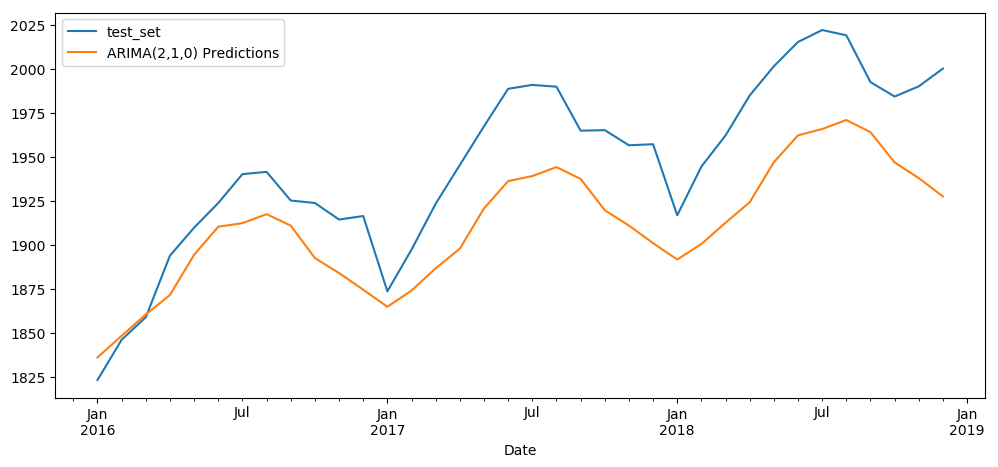

In [65]:
test_set["Employees"].plot(label="test_set", legend=True, figsize=(12,5))
arima_preds.plot(label="ARIMA(2,1,0) Predictions", legend=True);

### 5. Seasonal AutoRegressive Integrated Moving Average - SARIMA(p,d,q)(P,D,Q)m

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [67]:
auto_arima(data["Employees"], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1134.664
Date:                            Fri, 16 Feb 2024   AIC                           2277.328
Time:                                    17:56:21   BIC                           2292.726
Sample:                                         0   HQIC                          2283.459
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0477      0.292     -0.163      0.870      -0.620       0.524
ar.S.L12       0.5291      0.040     13.286      0.000       0.451       0.607
ar.S.L24       0.4303      0.041     10.453      0.000       0.350       0.511
sigma2        37.2952      2.157     17.294      0.000      33.068      41.522
===================================================================================
Ljung-Box (Q):                       99.53   Jarque-Bera (JB):                51.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.29
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

***The recommended order we got is SARIMAX(0, 1, 0)x(2, 0, 0, 12)***

In [84]:
sarima_model = SARIMAX(train_set["Employees"], order=(0,1,0), seasonal_order=(2,0,0,12))
sarima_results = sarima_model.fit()

In [85]:
sarima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  312
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1015.402
Date:                            Fri, 16 Feb 2024   AIC                           2036.803
Time:                                    18:16:19   BIC                           2048.023
Sample:                                01-01-1990   HQIC                          2041.288
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5215      0.040     13.119      0.000       0.444       0.599
ar.S.L24       0.4351      0.041     10.544      0.000       0.354       0.516
sigma2        36.6650      2.149     17.065      0.000      32.454      40.876
===================================================================================
Ljung-Box (Q):                      110.81   Jarque-Bera (JB):                69.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.40
Prob(H) (two-sided):                  0.61   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
sarima_preds = sarima_results.predict(start=start, end=end, dynamic=False, typ="levels")

In [87]:
for i in range(len(sarima_preds)):
    print(f"Predicted = {sarima_preds[i]:<11.10}, expected = {test_set['Employees'][i]}")

Predicted = 1825.403535, expected = 1823.2
Predicted = 1847.44708 , expected = 1846.1
Predicted = 1866.604579, expected = 1858.9
Predicted = 1889.570104, expected = 1893.9
Predicted = 1913.179581, expected = 1909.8
Predicted = 1929.493949, expected = 1923.8
Predicted = 1938.848191, expected = 1940.2
Predicted = 1944.493305, expected = 1941.5
Predicted = 1928.309162, expected = 1925.2
Predicted = 1925.089989, expected = 1923.8
Predicted = 1917.986189, expected = 1914.4
Predicted = 1924.020206, expected = 1916.4
Predicted = 1897.194874, expected = 1873.6
Predicted = 1919.131788, expected = 1897.3
Predicted = 1937.518873, expected = 1923.4
Predicted = 1960.197624, expected = 1945.4
Predicted = 1983.168682, expected = 1967.4
Predicted = 1998.46338 , expected = 1988.7
Predicted = 2009.475876, expected = 1990.9
Predicted = 2013.898938, expected = 1989.9
Predicted = 1998.889682, expected = 1964.9
Predicted = 1996.993397, expected = 1965.2
Predicted = 1989.503816, expected = 1956.6
Predicted =

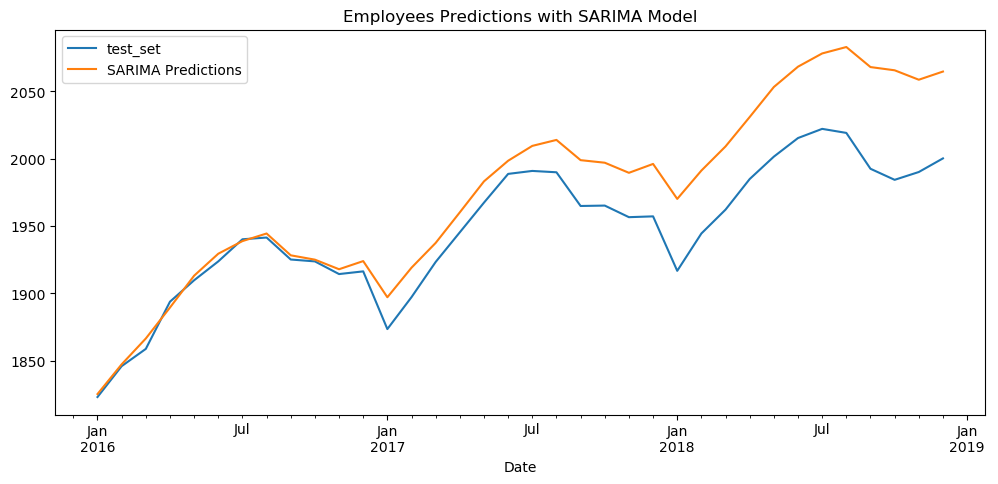

In [88]:
test_set["Employees"].plot(label="test_set", legend=True, figsize=(12,5))
sarima_preds.plot(label="SARIMA Predictions", legend=True)
plt.title("Employees Predictions with SARIMA Model");

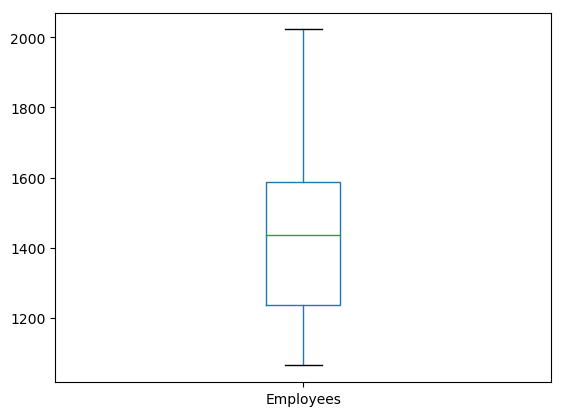

In [89]:
data["Employees"].plot(kind="box");

### Model Evaluations

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
def model_evaluation(model, test_set, predictions):
    mae = mean_absolute_error(test_set, predictions)
    mse = mean_squared_error(test_set, predictions)
    rmse = np.sqrt(mse)
    print(f"The {model} model evaluation summary: ")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")

In [92]:
model_evaluation("Holt-Winters", test_set["Employees"], holwin_preds)

The Holt-Winters model evaluation summary: 
MAE: 27.6026846212457
MSE: 1358.4525957031442
RMSE: 36.85719191288376


In [93]:
model_evaluation("AR", test_set["Employees"], ar_preds)

The AR model evaluation summary: 
MAE: 107.2843961536268
MSE: 14093.819357758097
RMSE: 118.71739281907305


In [94]:
model_evaluation("ARMA", test_set["Employees"], arma_preds)

The ARMA model evaluation summary: 
MAE: 1944.3504845716375
MSE: 3782926.0269528916
RMSE: 1944.9745568908843


In [95]:
model_evaluation("ARIMA", test_set["Employees"], arima_preds)

The ARIMA model evaluation summary: 
MAE: 36.31920892025287
MSE: 1625.0424867075892
RMSE: 40.31181572079815


In [96]:
model_evaluation("SARIMA", test_set["Employees"], sarima_preds)

The SARIMA model evaluation summary: 
MAE: 28.64790417084849
MSE: 1411.7405230803845
RMSE: 37.57313565674795


### Retrain the Model on the Full Data and Forecast One Year into Future

In [97]:
final_model = SARIMAX(data["Employees"], order=(0,1,0), seasonal_order=(2,0,0,12))
final_results = final_model.fit()

In [99]:
forecast = final_results.predict(start=len(data), end=len(data)+36, dynamic=False, typ="levels")

In [100]:
forecast

2019-01-01    1960.423880
2019-02-01    1985.270286
2019-03-01    2005.854537
2019-04-01    2027.323764
2019-05-01    2045.564010
2019-06-01    2062.021317
2019-07-01    2066.566155
2019-08-01    2064.548442
2019-09-01    2039.725713
2019-10-01    2035.514022
2019-11-01    2034.888867
2019-12-01    2040.493028
2020-01-01    2002.078409
2020-02-01    2027.133051
2020-03-01    2045.634657
2020-04-01    2066.753169
2020-05-01    2083.541338
2020-06-01    2098.182593
2020-07-01    2103.510255
2020-08-01    2101.153126
2020-09-01    2076.583677
2020-10-01    2070.830797
2020-11-01    2072.992078
2020-12-01    2080.298461
2021-01-01    2042.872616
2021-02-01    2066.811325
2021-03-01    2085.449836
2021-04-01    2105.853849
2021-05-01    2122.578171
2021-06-01    2137.399932
2021-07-01    2142.172956
2021-08-01    2140.058238
2021-09-01    2116.386536
2021-10-01    2111.531577
2021-11-01    2112.407010
2021-12-01    2118.682632
2022-01-01    2082.365209
Freq: MS, dtype: float64

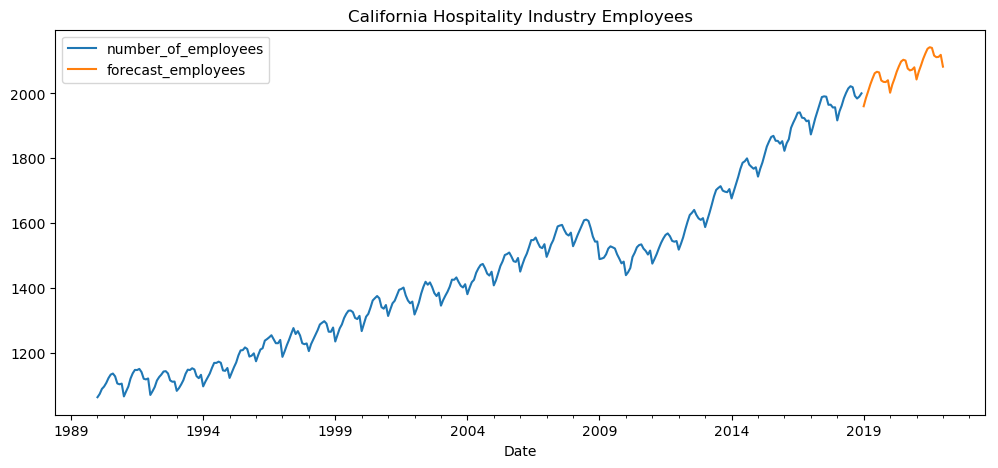

In [101]:
plt.figure(figsize=(12,5))
data["Employees"].plot(label="number_of_employees", legend=True)
forecast.plot(label="forecast_employees", legend=True)
plt.title("California Hospitality Industry Employees");

# GOOOOOOOOOOOOOOOOOOOD!!!